In [1]:
import torch
from torch_geometric.loader import DataLoader
import os
import pickle
from sklearn.model_selection import KFold
import numpy as np
import random
from torch_geometric.nn import global_mean_pool, GATConv
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

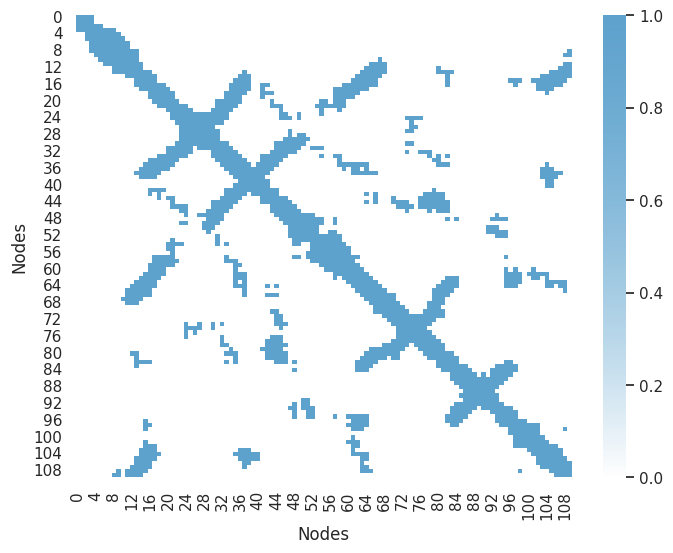

In [4]:
data_path = "/home/bli/GNN/Graph_bin/data/homology/alphafold_test/fold_completed_pkl_BLOSUM62+ESM/test"

dataset = []

# 自定义颜色映射，0为白色，1为黑色
cmap = mcolors.LinearSegmentedColormap.from_list('white_to_black', ['#FFFFFF', '#0072B599'], N=256)

for filename in os.listdir(data_path):
    if filename == "ygjH.pkl":
        file_path = os.path.join(data_path, filename)
        with open(file_path, 'rb') as f:
            data = pickle.load(f).to(torch.device('cuda'))
            # 假设你的稀疏矩阵的边存储在data.edge中
            edges = data.edge_index

            # 获取稀疏矩阵的形状
            num_nodes = edges.max().item() + 1  # 假设节点索引从0开始，要获取节点数，可以找到最大节点索引并加1

            # 创建一个与稀疏矩阵形状相同的全零矩阵
            adjacency_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.float32, device=edges.device)

            # 将稀疏矩阵的边设置为1
            adjacency_matrix[edges[0], edges[1]] = 1
            adjacency_matrix[edges[1], edges[0]]  = 1

            # 现在adjacency_matrix是一个0和1的矩阵，表示图的邻接矩阵

            # 创建热图
            sns.set(font_scale=1)  # 设置字体缩放因子
            plt.figure(figsize=(8, 6))  # 设置图形大小
            sns.heatmap(adjacency_matrix.cpu().numpy(), cmap=cmap, annot=False)  # 使用热图表示

            # plt.title(filename.replace(".pkl"," --- ") + 'Distance Map')
            plt.title('')
            plt.xlabel('Nodes')
            plt.ylabel('Nodes')
            plt.show()